In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose




In [4]:
# Load new dataset
df = pd.read_csv("../data/processed/churn-bigml-80_cleaned.csv")
print("Shape:", df.shape)
print(df.columns.tolist())

Shape: (2666, 20)
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [5]:
# Add Date column (daily frequency starting from 2020-01-01)
df['Date'] = pd.date_range(start="2020-01-01", periods=len(df), freq='D')

# Set Date as index
df.set_index('Date', inplace=True)

print(df.head())


           State  Account length  Area code International plan  \
Date                                                             
2020-01-01    KS             128        415                 No   
2020-01-02    OH             107        415                 No   
2020-01-03    NJ             137        415                 No   
2020-01-04    OH              84        408                Yes   
2020-01-05    OK              75        415                Yes   

           Voice mail plan  Number vmail messages  Total day minutes  \
Date                                                                   
2020-01-01             Yes                     25              265.1   
2020-01-02             Yes                     26              161.6   
2020-01-03              No                      0              243.4   
2020-01-04              No                      0              299.4   
2020-01-05              No                      0              166.7   

            Total day calls  Tot

In [7]:
# Monthly churn count
monthly_churn = df['Churn'].resample('ME').sum()
print(monthly_churn.head())


Date
2020-01-31    2
2020-02-29    4
2020-03-31    6
2020-04-30    5
2020-05-31    2
Freq: ME, Name: Churn, dtype: int64


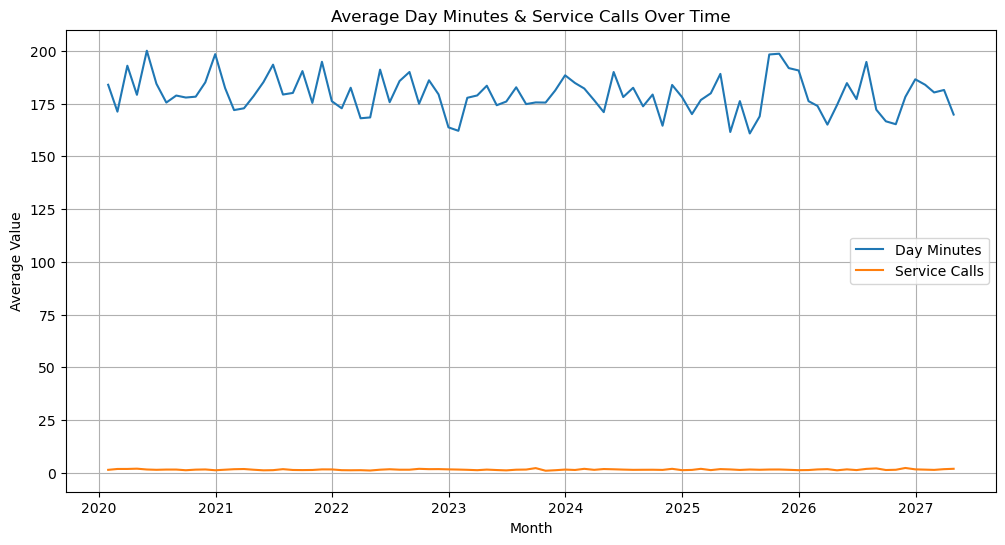

In [10]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Monthly averages only for numeric columns
monthly_avg = numeric_cols.resample('ME').mean()

# Plot selected features
plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg['Total day minutes'], label="Day Minutes")
plt.plot(monthly_avg.index, monthly_avg['Customer service calls'], label="Service Calls")
plt.title("Average Day Minutes & Service Calls Over Time")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()


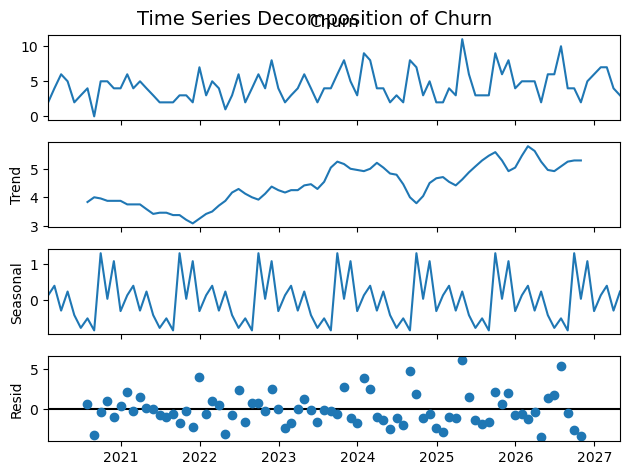

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_churn, model='additive', period=12)
decomposition.plot()
plt.suptitle("Time Series Decomposition of Churn", fontsize=14)
plt.show()


In [ ]:
# Load dataset and libraries.

# Add a Date column (daily from 2020-01-01) and set as index.

# Check missing values and duplicates → clean data.

# Standardize categorical columns (e.g., International plan, Churn).

# Resample churn data monthly → get churn counts.

# Calculate monthly averages for numeric features.

# Plot churn trend and smooth with moving average.

# Plot monthly usage metrics (e.g., day minutes, service calls).

# Perform time series decomposition → trend, seasonality, residual.

# Save outputs (CSV + plots) for reporting.

# Insights: observe churn trend, seasonal effects, and spikes.

# Next steps: forecasting and churn driver analysis.